# Investigating trends in BMI amongst teenagers in public schools

## Background and Motivation

- [ ] Insert text here

## Preliminary Data Import

- [ ] Add text here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# States A - M
dataset = pd.read_csv('databases/states_a-m1.csv')

# States N - Z
dataset = dataset.append(pd.read_csv('databases/states_n-z1.csv'))

# Drop BMI and any without proper age data
dataset = dataset.dropna(subset=["bmi", "age"])

dataset.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qnwenthungry,qnmusclestrength,qnsunscreenuse,qnindoortanning,qnsunburn,qnconcentrating,qncurrentasthma,qnwheresleep,qnspeakenglish,qntransgender
73898,AL,Alabama (AL),State,2.0,1999.0,5.0,203.9870,7.0,2.0,263599.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73899,AL,Alabama (AL),State,2.0,1999.0,5.0,135.9913,9.0,2.0,263600.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73900,AL,Alabama (AL),State,2.0,1999.0,5.0,65.0445,10.0,2.0,263601.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73901,AL,Alabama (AL),State,2.0,1999.0,5.0,116.8801,9.0,2.0,263602.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73904,AL,Alabama (AL),State,2.0,1999.0,5.0,66.6849,22.0,1.0,263605.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Tidying

- [ ] Add text here

In [ ]:
# Keep columns pertaining to demographics
demographics = ["sitecode","year","age","sex","race4","race7","stheight","stweight","bmi"]

# Select behavior survey questions
behaviors = ["qnfr1", "qnveg1','qnsoda1','qnmilk1','qnbk7day','qnpa0day','qnpa7day']
            
# Drop extra values
dataset = dataset[demographics + behaviors]

In [ ]:
# Testing upon sex demographic
dataset["sexlabel"] = dataset["sex"]

# Label as male or female for visibility for x-axis readability
def sexlabeling(x):
        if x == 1.0:
            return "female"
        elif x == 2.0:
            return "male"
        else:
            return np.nan

dataset["sexlabel"] = dataset["sexlabel"].map(sexlabeling)

## Looking for Trends

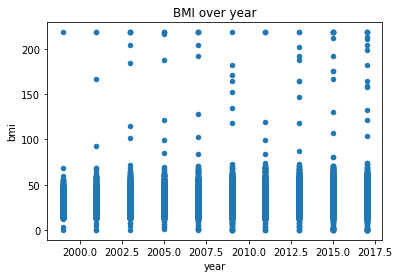

In [3]:
# Scatter of BMIs over time
dataset.plot.scatter(y="bmi", x="year", title="BMI over year")

Text(0.5, 1.0, 'BMI Violin Distrubtions')

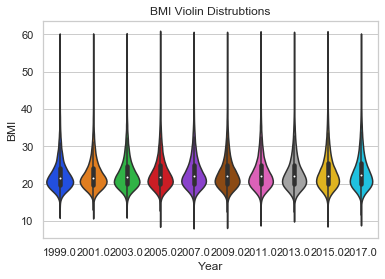

In [4]:
# Clearly there is some error with BMIs over 200, as that would require weights over 500 in children
# so let's cap it at 60. Additionally some seem to drop as low as 0, so I will introduce a floor of 9
dataset = dataset[dataset["bmi"] < 60]
dataset = dataset[dataset["bmi"] > 9]

# Let's only look at ages 13 - 17
dataset = dataset[dataset["age"] < 7]
dataset = dataset[dataset["age"] > 1]

# Also, since the scatterplots are quite dense per survey year, I'd perfer
# Violin Plots

# Set the style
sns.set(style="whitegrid")

# Plot Continent vs Residuals
ax = sns.violinplot(x="year", y="bmi", data=dataset, palette="bright")

# Improve look and Labeling
plt.xlabel("Year")
plt.ylabel("BMI")
plt.title("BMI Violin Distributions")

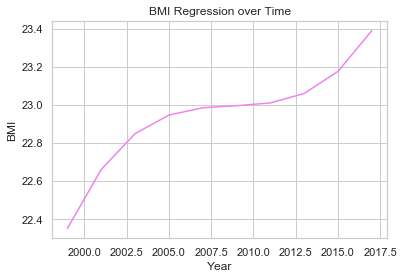

In [13]:
plt.figure()

# Create a regression
reg = np.poly1d(np.polyfit(dataset["year"], dataset["bmi"], 3))

# Find the general trend
plt.plot(dataset["year"].unique(), reg(dataset["year"].unique()), color = "violet")
plt.title("BMI Regression over Time")
plt.xlabel("Year")
plt.ylabel("BMI")
plt.show()

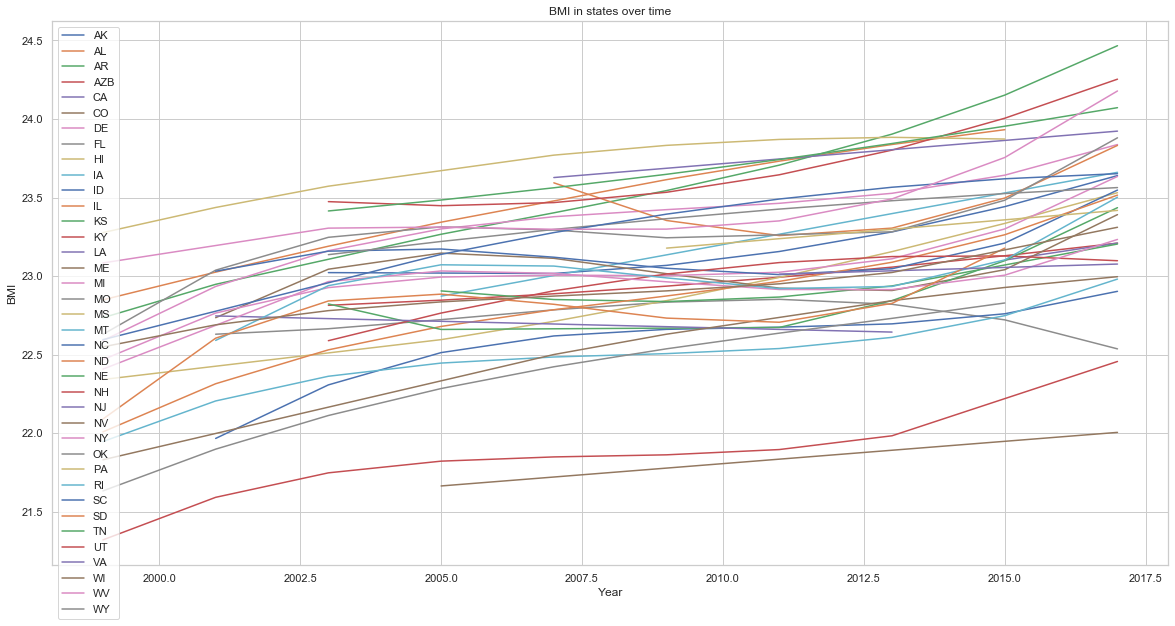

In [6]:
plt.figure(figsize=(20, 10))

# Create a regression per State
for state, datasubset in dataset.groupby("sitecode"):
    # Pick a degree low enough so the rank will be well-conditioned
    # (Some states have very few years of participation)
    deg = int(datasubset["year"].unique().size / 3)
    
    if deg == 0:
        deg = 1
    
    # Regression
    reg = np.poly1d(np.polyfit(datasubset["year"], datasubset["bmi"], deg))
    
    
    plt.plot(datasubset["year"], reg(datasubset["year"]), label=state)
    
    
    
plt.title("BMI in states over time")
plt.xlabel("Year")
plt.ylabel("BMI")
plt.legend(loc="upper left")
plt.show()

Text(0.5, 1.0, 'BMI Violin Distrubtions')

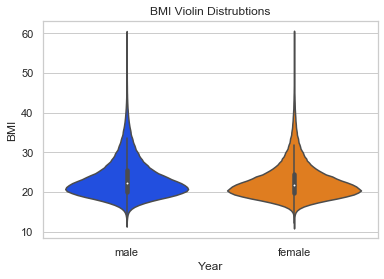

In [35]:
# Set the style
sns.set(style="whitegrid")

# Plot Sex vs BMI
ax = sns.violinplot(x="sexlabel", y="bmi", data=dataset, palette="bright")

# Improve look and Labeling
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.title("BMI Distributions between the Sexes")

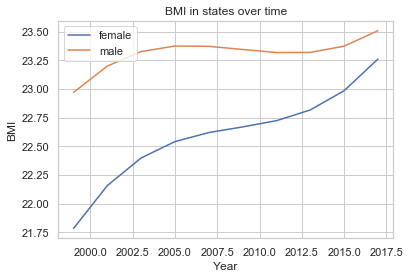

In [37]:
plt.figure()

# Create a regression per State
for sex, datasubset in dataset.groupby("sexlabel"):
    
    # Regression
    reg = np.poly1d(np.polyfit(datasubset["year"], datasubset["bmi"], 3))
    
    
    plt.plot(datasubset["year"].unique(), reg(datasubset["year"].unique()), label=sex)
    
    
    
plt.title("BMI between Sexes over time")
plt.xlabel("Year")
plt.ylabel("BMI")
plt.legend(loc="upper left")
plt.show()

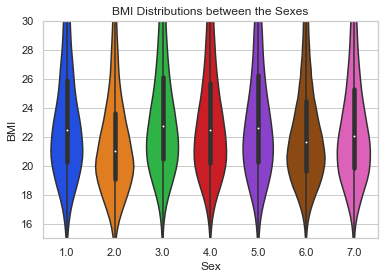

In [42]:
# Set the style
sns.set(style="whitegrid")

dataset["race7label"] = x["race7"]

# Plot Sex vs BMI
ax = sns.violinplot(x="race7", y="bmi", data=dataset, palette="bright")

# Improve look and Labeling
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.title("BMI Distributions between the Sexes")
plt.ylim(15,30)
plt.show()